In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import astropy.units as u

In [2]:
# read a .spec file
def read_spec_file(file, txt=False):
    
    if txt:
        
        # read lines without comment and empty lines
        with open(file, 'r') as f:
            lines = f.readlines()  
        data = []
        
        for line in lines:
            if line.strip():    # Check if the line is not empty
                try:
                    data.append([float(x) for x in line.strip().split('\t')])
                except Exception as e:
                    # print(f'Error: {e}')
                    pass
                    
        data = np.array(data)
    
    else:
    
        with open(file, 'r') as f:
            lines = f.readlines()
        data = []
        
        for line in lines[2:]:
            if line.strip():    # Check if the line is not empty
                data.append([float(x) for x in line.strip().split('    ')])
        data = np.array(data)
        
        # reverse the data
        data = data[::-1]
    
    return data

def downsample(data, factor):
    
    """_summary_
    
    This function downsamples and average the data by a factor of `factor`.
    
    Returns:
        np.array:
            The downsampled data.
        
    Args:
        data (array):
            The array you want to downsample.
        factor (int): 
            The factor by which you want to downsample the data.
    """
    
    length = len(data) - len(data)%factor
    
    _sum = np.zeros(int(length/factor))
    
    for i in range(factor):
        _sum = np.array(data[i:length:factor]) + _sum
    
    return _sum/factor

def fnu2flumbda(wl, fnu):
    
    '''
    wl: wavelength in Angstrom
    fnu: flux density in erg/s/cm^2 
    '''
    
    fnu = fnu * u.erg / u.s / u.Hz / u.cm**2
    flu = fnu.to(u.erg / u.s / u.AA / u.cm**2,
            equivalencies=u.spectral_density(wl * u.AA))
    
    return flu.value

## Bobcat templates

In [16]:
MODname = []
with open('/home/yuan/LePhare/lephare_dev/sed/STAR/STAR_MOD_ALL2.list', 'r') as f:
    lines = f.readlines()
for line in lines:
    MODname.append(line.split('\t')[0].split('/')[-1][:-1])
    
MODname[391], MODname[392], MODname[393]

('sp_t575g100nc_m0.dat', 'sp_t525g316nc_m0.dat', 'sp_t500g562nc_m+0.5.dat')

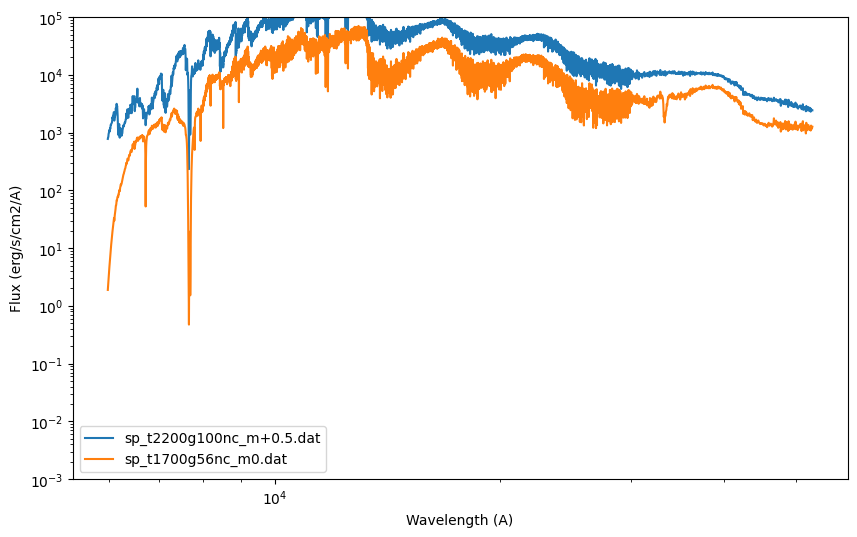

In [17]:
def read_dat_file(file):
    
    with open('Sonora_Bobcat/spec_ds/'+file, 'r') as f:
        lines = f.readlines()
    data = []
    
    for line in lines:
        if line.strip():    # Check if the line is not empty
            data.append([float(x) for x in line.strip().split(' ')])
    data = np.array(data)
    
    return data

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i in range(539, 541):
    data = read_dat_file(MODname[i])
    ax.plot(data[:, 0], data[:, 1], label=MODname[i])
    
ax.set_ylim([10**-3, 10**5])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Wavelength (A)')
ax.set_ylabel('Flux (erg/s/cm2/A)')
ax.legend()

plt.show()

In [4]:
spec_path = '/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/spectra/'
spec_files = glob.glob(spec_path+'*.0')

In [54]:
len(spec_files)

429

In [56]:
a = 1.*u.um
a.to(u.AA)
a.to(u.erg / u.s / u.Hz,
     equivalencies=u.spectral_density(5500 * u.AA)) 

<Quantity 10000. Angstrom>

In [13]:
for i in range(2):
    data = read_spec_file(spec_files[i])
    file_name = spec_files[i].split('/')[-1]
    print(file_name)

sp_t375g316nc_m0.0
sp_t275g562nc_m0.0


### Here

In [18]:
spec_path = '/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/spectra/'
spec_files = glob.glob(spec_path+'*0.5')
for i in range(len(spec_files)):

    # print(spec_files[0])
    data = read_spec_file(spec_files[i])
    file_name = spec_files[i].split('/')[-1]

    wavelength = downsample(data[20000:316000,0], 40)*10**4 # lambda from 5900 AA to 52000 AA
    fnu = downsample(data[20000:316000,1], 40)
    print(fnu, type(fnu))
    
    flux = fnu2flumbda(wavelength, fnu)

    # Define the format string for wavelength and flux
    fmt_wavelength = '%.5f'  # 5 decimal places for wavelength
    fmt_flux = '%.5e'        # Scientific notation with 5 decimal places for flux

    # Save the data using np.savetxt with the specified format strings
    # np.savetxt('/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/spec_ds/'+file_name+'.dat', 
    #         np.column_stack([wavelength, flux]), fmt=[fmt_wavelength, fmt_flux])
    
    # if i%100 == 0:
    #     print('Processing file: ', i)

[7.52797225e-14 8.15825050e-14 8.61844550e-14 ... 7.47939926e-08
 1.60276905e-07 1.45272550e-07] <class 'numpy.ndarray'>
[2.95791175e-10 3.29941550e-10 3.67006575e-10 ... 1.62193115e-06
 1.64391040e-06 1.80712033e-06] <class 'numpy.ndarray'>
[4.13885525e-14 4.42665275e-14 4.69618400e-14 ... 1.19514586e-07
 1.98203060e-07 1.93859897e-07] <class 'numpy.ndarray'>
[7.73972775e-12 9.47308900e-12 1.15819300e-11 ... 8.73791825e-07
 8.75485500e-07 9.30993275e-07] <class 'numpy.ndarray'>
[8.05745350e-09 8.54159350e-09 8.59546850e-09 ... 2.52342450e-06
 2.45607900e-06 2.42391475e-06] <class 'numpy.ndarray'>
[6.98435400e-15 9.06160575e-15 8.33152200e-15 ... 2.09195048e-10
 6.99196325e-10 7.21263375e-10] <class 'numpy.ndarray'>


KeyboardInterrupt: 

In [19]:
spec_path = '/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/spec_ds/'
spec_files = glob.glob(spec_path + '*.dat')

# save the file names to a txt file
with open('./Sonora_Bobcat_ds.list', 'w') as f:
    for file in spec_files:
        f.write('Sonora_Bobcat/spec_ds/'+file.split('/')[-1]+'\n')

## Spectype templates

In [35]:
spec_path = '/home/yuan/LePhare/lephare_dev/sed/STAR/BD_type/'
spec_files = glob.glob(spec_path+'bd_only/'+'*.txt')

In [36]:
len(spec_files)

19

In [32]:
for i in range(len(spec_files)):

    # print(spec_files[0])
    data = read_spec_file(spec_files[i], txt=True)
    file_name = spec_files[i].split('/')[-1][:-4]
    
    wavelength = data[:,0]*10**4 # lambda from 5900 AA to 52000 AA
    flux = data[:,1]
    
    # flux = fnu2flumbda(wavelength, fnu)

    # Define the format string for wavelength and flux
    fmt_wavelength = '%.5f'  # 5 decimal places for wavelength
    fmt_flux = '%.5e'        # Scientific notation with 5 decimal places for flux

    # Save the data using np.savetxt with the specified format strings
    np.savetxt(spec_path+'bd_ds/'+file_name+'.dat', np.column_stack([wavelength, flux]), fmt=[fmt_wavelength, fmt_flux])
    
    # if i%10 == 0:
    #     print('Processing file: ', i)
    # print('Processing file: ', i)

In [37]:
spec_path = '/home/yuan/LePhare/lephare_dev/sed/STAR/BD_type/bd_ds/'
spec_files = glob.glob(spec_path + '*.dat')

# save the file names to a txt file
with open('bdtype_spec_ds.list', 'w') as f:
    for file in spec_files:
        f.write('BD_type/bd_ds/'+file.split('/')[-1]+'\n')

## Y-dwarf spec

In [3]:
# read a fits file
from astropy.io import fits

# /home/yuan/LePhare/lephare_dev/sed/STAR/
data = 'BD_type/y-dwarf_spec/jw02302-o104_s00001_nirspec_clear-prism-s200a1-subs200a1_x1d.fits'

# with fits.open(data) as hdul:
#     hdul.info()
#     hdr = hdul[0].header
#     data = hdul[1].data

hdul = fits.open(data)
hdr = hdul[0].header
data = hdul[1].data


### draw

In [21]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2024-07-08T13:45:17.573' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw02302-o104_s00001_nirspec_clear-prism-s200a1-subs200a1_x1d.fits' / 
SDP_VER = '2024_1a '           / Data processing (DP) Software Version          
PRD_VER = 'PRDOPSSOC-066'      / S&OC Project Reference Database (PRD) Version  
OSS_VER = '008.004.013.000'    / Observatory Scheduling Software (OSS) Version  
GSC_VER = 'GSC30   '        

In [28]:
data.columns

ColDefs(
    name = 'WAVELENGTH'; format = 'D'; unit = 'um'
    name = 'FLUX'; format = 'D'; unit = 'Jy'
    name = 'FLUX_ERROR'; format = 'D'; unit = 'Jy'
    name = 'FLUX_VAR_POISSON'; format = 'D'; unit = 'Jy^2'
    name = 'FLUX_VAR_RNOISE'; format = 'D'; unit = 'Jy^2'
    name = 'FLUX_VAR_FLAT'; format = 'D'; unit = 'Jy^2'
    name = 'SURF_BRIGHT'; format = 'D'; unit = 'MJy/sr'
    name = 'SB_ERROR'; format = 'D'; unit = 'MJy/sr'
    name = 'SB_VAR_POISSON'; format = 'D'; unit = 'MJy^2 / sr^2'
    name = 'SB_VAR_RNOISE'; format = 'D'; unit = 'MJy^2 / sr^2'
    name = 'SB_VAR_FLAT'; format = 'D'; unit = 'MJy^2 / sr^2'
    name = 'DQ'; format = 'J'; bzero = 2147483648
    name = 'BACKGROUND'; format = 'D'; unit = 'MJy/sr'
    name = 'BKGD_ERROR'; format = 'D'; unit = 'MJy/sr'
    name = 'BKGD_VAR_POISSON'; format = 'D'; unit = 'MJy^2 / sr^2'
    name = 'BKGD_VAR_RNOISE'; format = 'D'; unit = 'MJy^2 / sr^2'
    name = 'BKGD_VAR_FLAT'; format = 'D'; unit = 'MJy^2 / sr^2'
    name = 'NP

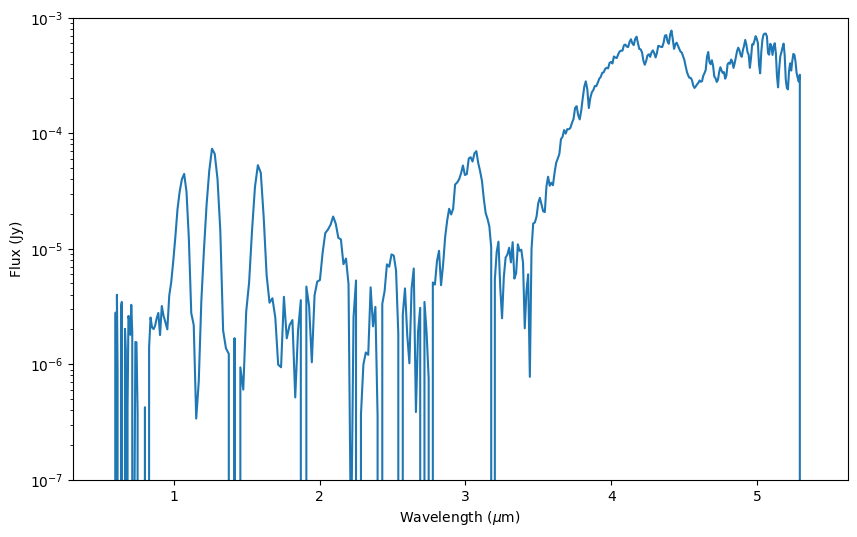

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(
    data.WAVELENGTH, data.FLUX
)

ax.set_xlabel('Wavelength ($\\mu$m)')
ax.set_ylabel('Flux (Jy)')
ax.set_yscale('log')
ax.set_ylim([10**-7, 10**-3])

plt.show()

In [38]:
len(data.WAVELENGTH)

435

### save

In [4]:
spec_path = '/home/yuan/LePhare/lephare_dev/sed/STAR/BD_type/'

wl = data.WAVELENGTH*10**4
flux = fnu2flumbda(wl, data.FLUX)


fmt_wavelength = '%.5f'  # 5 decimal places for wavelength
fmt_flux = '%.5e'        # Scientific notation with 5 decimal places for flux

np.savetxt(spec_path+'bd_ds/'+'WISEPCJ205628.90+145953.3'+'.dat',
        np.column_stack([wl, flux]), fmt=[fmt_wavelength, fmt_flux])
